<a href="https://colab.research.google.com/github/yashvardhanbhardwaj/DefinitelyTyped/blob/master/code/experiment_on_close_price_for_200_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/aapl.us.txt',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
#plot close price
#plt.figure(figsize=(10,6))
# plt.grid(True)
# plt.xlabel('Year')
# plt.ylabel('Close Prices')
# All months data of 2017 for Close price
#data.tail()
#plt.title('All months data of 2017 for Close price')
#plt.plot(data.loc['2017-01-01':'2017-12-31']['Close'])
#plt.figure()
## Difference of close values for each date
#plt.title('Difference of close values for each date')
#plt.plot(np.diff(data.loc['2017-01-01':'2017-12-31']['Close']))
#plt.figure()
## Histogram for values
#plt.title('Histogram for values of Close for each date')
#plt.hist(np.diff(data.loc['2017-01-01':'2017-12-31']['Close']))
## plt.title('Closing Price')
## plt.show()
#plt.figure(figsize=(10,6))
## plt.grid(True)
## plt.xlabel('Year')
## plt.ylabel('Close Prices')
## All close date in file
#plt.title('All Close prices in file')
#plt.plot(data['Close'])
#plt.figure()
## Difference of Close prices
#plt.title('Difference of Close prices in file')
#plt.plot(np.diff(data['Close']))
#plt.figure()
## Histogram for whole data
#plt.title('Histogram for whole Close prices in file')
#plt.hist(np.diff(data['Close']))
#plt.figure()
#df_close = data['Close']
#df_close.plot(style='k.')
#plt.title('Scatter plot of closing price')
#plt.show()
##data.shape
## train, test = train_test_split(data, test_size=0.33)
#data.head()
df1=data.reset_index()['Close']
#df1
#plt.plot(df1)
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
#print(df1)
training_size=int(len(df1)*0.67)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)
 
 
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 200
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
#print(X_train.shape), print(y_train.shape)

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

#X_train, X_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  if __name__ == '__main__':


In [3]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(200,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 200, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
85/85 [==============================] - 35s 357ms/step - loss: 6.2475e-05 - val_loss: 0.0040
Epoch 2/200
85/85 [==============================] - 30s 351ms/step - loss: 1.5812e-06 - val_loss: 0.0018
Epoch 3/200
85/85 [==============================] - 30s 352ms/step - loss: 2.1506e-06 - val_loss: 0.0015
Epoch 4/200
85/85 [==============================] - 30s 353ms/step - loss: 1.9359e-06 - val_loss: 0.0020
Epoch 5/200
85/85 [==============================] - 30s 355ms/step - loss: 1.7429e-06 - val_loss: 0.0021
Epoch 6/200
85/85 [==============================] - 30s 351ms/step - loss: 1.7128e-06 - val_loss: 0.0019
Epoch 7/200
85/85 [==============================] - 31s 365ms/step - loss: 1.7963e-06 - val_loss: 0.0027
Epoch 8/200
85/85 [==============================] - 30s 357ms/step - loss: 1.6808e-06 - val_loss: 0.0017
Epoch 9/200
85/85 [==============================] - 30s 353ms/step - loss: 1.4551e-06 - val_loss: 0.0013
Epoch 10/200
85/85 [==========================

In [5]:
import tensorflow as tf
### prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [6]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [7]:
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2.6157809244233055

In [8]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

73.29901497390037

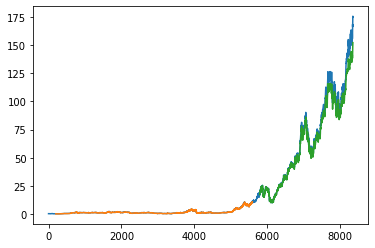

In [9]:
### Plotting 
# shift train predictions for plotting
look_back=200
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [10]:
len(test_data)


2761

In [11]:
x_input=test_data[(len(test_data) - 200):].reshape(1,-1)
x_input.shape

(1, 200)

In [12]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [13]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=200
i=0
while(i<30):
    
    if(len(temp_input)>200):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
  
print(lst_output)

[0.8661634]
201
1 day input [0.67966608 0.72111904 0.71997866 0.72300068 0.72984298 0.73674231
 0.73965029 0.74501009 0.74335654 0.74991374 0.75960701 0.76240095
 0.76148864 0.76359835 0.76912922 0.77146701 0.76798883 0.76890114
 0.77044066 0.77078278 0.7865771  0.78190152 0.78652008 0.78401123
 0.78503758 0.7821296  0.78030498 0.78292787 0.78326998 0.78207258
 0.79028334 0.79159479 0.78760344 0.79598527 0.78686219 0.79575719
 0.79290623 0.79130969 0.79267815 0.8091567  0.81098132 0.80989795
 0.80835843 0.80858651 0.81463055 0.81041113 0.80835843 0.80653382
 0.80556449 0.79695459 0.79792392 0.79364748 0.79809498 0.79450277
 0.79153777 0.80145911 0.8005468  0.8082444  0.81331911 0.80847247
 0.80909968 0.80830142 0.82483699 0.83008275 0.82757391 0.82455189
 0.8382365  0.86104418 0.86657505 0.86246967 0.86993918 0.88208427
 0.8798035  0.87854908 0.84895611 0.86195649 0.86486447 0.87016726
 0.86908389 0.86646101 0.86948303 0.86800053 0.86834264 0.8631539
 0.8655487  0.87843504 0.86982514 0

In [14]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [15]:
len(df1)

8364

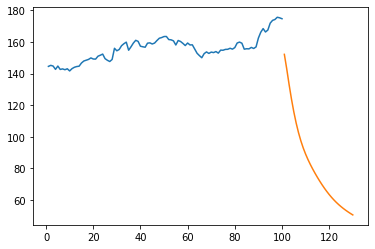

In [17]:
plt.plot(day_new,scaler.inverse_transform(df1[8264:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

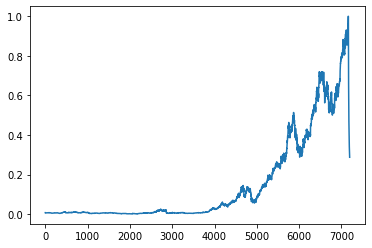

In [18]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [19]:

df3=scaler.inverse_transform(df3).tolist()

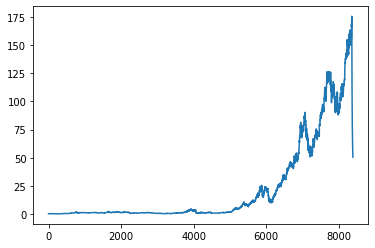

In [20]:
plt.plot(df3)